In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the dataset: The dataset consists of biiding dataset retrieved from Kaggle - "Real time bidding" dataset: This is real real-time bidding data that is used to predict if an advertiser should bid for a marketing slot e.g. a banner on a webpage. Explanatory variables are things like browser, operation system or time of the day the user is online, marketplace where identifiers were traded on earlier, etc. The column 'convert' is 1, when the person clicked on the ad, and 0 if this is not the case.

In [0]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
file = '/content/drive/My Drive/Big Data Machine Learning/biddings.csv'
# Step1: Importing the data and loading only 50000 rows
df = pd.read_csv(file,nrows=50000)
print(df.shape)
# Exploring the dataset
df.head()


(50000, 89)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,convert
0,-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,-0.27,0.50,-0.55,-0.27,-0.89,-0.01,-0.53,1.19,-0.36,0.07,0.01,0.08,0.06,0.18,0.47,0.33,0.49,-0.33,0.32,-0.05,0.20,0.12,-0.07,0.11,0.07,-0.04,-0.12,-0.00,-0.08,-0.02,...,-0.41,-0.62,-1.09,-0.27,0.03,-0.15,-1.67,0.49,-0.08,-0.10,-0.31,-0.20,1.16,-0.49,-0.26,1.34,1.02,1.28,-0.58,-1.17,0.02,-1.59,-1.17,-0.59,0.76,0.05,1.06,-0.12,0.18,-1.82,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07,0
1,0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,-0.36,-0.23,-0.07,0.61,1.04,-1.99,1.85,0.69,0.22,3.86,0.14,0.39,0.51,0.61,1.06,0.74,0.33,0.09,-0.12,0.16,0.16,0.16,-0.00,-0.01,-0.02,-0.13,-0.08,-0.06,-0.00,0.02,...,-0.23,-0.18,0.43,0.56,-1.62,-0.67,-1.53,0.64,0.24,-1.03,-0.49,-0.62,-1.75,0.12,0.07,-0.17,1.30,1.52,-0.56,-0.99,1.14,1.20,-1.82,3.23,1.23,0.08,1.17,-1.43,2.69,-0.30,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22,0
2,0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,-0.97,1.17,-0.54,-0.21,-0.21,-1.44,-0.92,-0.78,0.45,-0.03,-0.09,0.16,0.30,-0.83,0.05,1.43,1.33,-0.85,0.20,-0.11,0.39,0.13,0.01,0.09,-0.01,-0.12,-0.03,-0.03,0.06,0.06,...,0.17,-0.04,2.03,0.00,-0.66,0.77,-1.05,0.47,0.77,0.50,-1.14,-1.12,-0.34,0.40,-0.39,-0.21,-1.23,0.44,-0.12,-0.40,-0.54,0.63,0.27,-1.06,-0.38,0.11,0.43,-0.44,0.55,-0.72,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37,0
3,-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,-0.07,-0.27,0.02,0.30,0.79,-2.49,0.44,0.69,0.32,3.81,0.15,-0.23,0.45,0.58,0.87,0.81,0.02,0.11,-0.09,0.09,0.12,0.15,0.02,-0.02,0.02,0.17,-0.17,-0.01,0.04,0.02,...,-0.28,-0.23,-0.45,0.68,-0.98,0.24,-0.54,1.93,-0.06,-0.33,0.41,0.03,0.77,0.15,-0.28,-0.52,0.33,0.87,-0.34,0.26,-0.57,0.52,0.23,-0.58,-0.12,0.06,-0.74,0.56,0.39,0.29,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18,0
4,-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,-0.28,-1.12,4.90,-0.49,3.59,2.74,0.94,1.34,-0.61,0.44,0.38,-0.53,0.07,0.64,-0.68,-0.92,-1.68,0.81,0.17,-0.44,1.38,0.82,0.48,-0.32,-0.83,0.80,-1.52,0.07,0.54,0.14,...,-0.15,-0.57,-0.31,-0.07,-0.04,0.22,-0.01,0.22,-0.20,-0.30,-1.68,-0.04,0.43,-0.09,0.00,0.54,-1.74,-0.87,0.74,1.48,0.19,0.82,0.49,0.59,1.71,-0.02,-0.77,-0.68,0.38,-0.09,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07,0


Data Exploration

In [0]:
df.describe().T
#df.isnull().sum()

,count,mean,std,min,25%,50%,75%,max
0,50000.0,-0.005740,0.056144,-0.02,-0.02,-0.01,-0.01,6.51
1,50000.0,-0.026803,2.957775,-28.47,-1.27,1.12,2.05,3.17
2,50000.0,0.002645,2.475532,-20.05,-2.06,1.39,2.34,3.06
3,50000.0,0.009721,2.060459,-1.55,-0.60,-0.38,-0.08,14.03
4,50000.0,-0.001213,1.695771,-17.57,-0.67,0.46,0.85,2.41
...,...,...,...,...,...,...,...,...
84,50000.0,0.000069,0.745503,-4.70,-0.17,-0.00,0.16,4.79
85,50000.0,0.005145,0.676576,-3.57,-0.24,-0.06,0.07,4.17
86,50000.0,0.000341,0.648139,-15.11,-0.26,0.06,0.27,13.50
87,50000.0,0.004103,0.623499,-29.65,-0.09,-0.02,0.08,40.78


In [0]:
print('Not Click', round(df['convert'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Click', round(df['convert'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Not Click 99.82 % of the dataset
Click 0.18 % of the dataset


The data is clearly imbalanced as over 99% of the data is showing 'not click'

Lets start with standardising the data

In [0]:
from sklearn.preprocessing import RobustScaler
import numpy as np

rob_scaler = RobustScaler()

df_copy = df.drop('convert',axis=1)
df_std = rob_scaler.fit_transform(df_copy)

df_new = pd.DataFrame(np.column_stack([df_std,df['convert'].values]),columns=df.columns)
df_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,convert
0,0.0,-0.466867,0.188636,-0.403846,0.223684,0.046512,-0.518519,0.21,-0.275862,0.376471,-0.321429,0.516854,-0.651515,-0.198529,-0.752294,-0.033898,-0.370370,0.780000,-0.666667,-0.064516,-0.176471,0.095238,-0.04,0.025641,0.532468,0.287129,0.426087,-0.447653,0.423077,-0.117647,0.515152,0.555556,-0.133333,0.571429,0.416667,-0.111111,-0.434783,-0.125,-0.8,0.0,...,-0.639344,-0.735294,-0.940171,-0.168831,0.096774,-0.242424,-1.380165,0.435484,-0.086538,-0.119403,-0.218750,-0.205607,1.074074,-0.548387,-0.229008,1.218182,0.909091,1.078947,-0.865672,-1.073394,0.019048,-1.500000,-1.229167,-0.518519,0.675926,0.088235,0.936937,-0.102804,0.155556,-1.926316,-0.296296,0.357895,-0.177083,1.244898,-0.090909,1.090909,-0.387097,-0.566038,0.529412,0.0
1,1.0,-1.575301,0.020455,2.500000,-5.151316,0.953488,0.518519,1.86,0.482759,0.882353,-0.482143,-0.303371,0.075758,0.448529,1.018349,-1.152542,1.392593,0.446667,0.106667,12.161290,0.588235,0.341270,0.86,0.576923,1.298701,0.693069,0.286957,0.158845,-0.423077,1.117647,0.393939,0.777778,0.333333,-0.285714,-0.333333,-0.444444,-0.260870,-0.875,-0.0,0.4,...,-0.344262,-0.088235,0.358974,0.909091,-2.564516,-0.767677,-1.264463,0.556452,0.221154,-1.507463,-0.359375,-0.598131,-1.620370,0.107527,0.022901,-0.154545,1.163636,1.289474,-0.835821,-0.908257,1.085714,1.132075,-1.906250,3.018519,1.111111,0.176471,1.036036,-1.327103,2.944444,-0.326316,-2.148148,-0.242105,1.239583,-1.061224,-3.250000,-0.727273,-1.129032,1.226415,-1.176471,0.0
2,2.0,-1.852410,-0.947727,-0.865385,0.302632,0.627907,0.018519,1.27,-1.120690,1.788235,-1.571429,1.269663,-0.636364,-0.154412,-0.128440,-0.841808,-0.659259,-0.533333,0.413333,-0.387097,-0.764706,0.158730,0.44,-1.269231,-0.012987,1.376238,1.156522,-1.198556,0.192308,-0.470588,1.090909,0.611111,0.400000,0.428571,-0.250000,-0.407407,-0.043478,-0.500,0.6,0.8,...,0.311475,0.117647,1.726496,0.181818,-1.016129,0.686869,-0.867769,0.419355,0.730769,0.776119,-0.867187,-1.065421,-0.314815,0.408602,-0.328244,-0.190909,-1.136364,0.342105,-0.179104,-0.366972,-0.514286,0.594340,0.270833,-0.953704,-0.379630,0.264706,0.369369,-0.401869,0.566667,-0.768421,-0.518519,0.389474,0.416667,0.836735,-1.386364,0.727273,-0.129032,-2.358491,2.294118,0.0
3,-1.0,0.259036,0.206818,2.403846,-4.967105,0.395349,0.129630,1.70,0.551724,0.188235,0.035714,-0.348315,0.212121,0.220588,0.788991,-1.435028,0.348148,0.446667,0.240000,12.000000,0.647059,-0.150794,0.74,0.538462,1.051948,0.762376,0.017391,0.187726,-0.365385,0.705882,0.272727,0.722222,0.466667,-0.357143,0.000000,0.666667,-0.652174,-0.250,0.4,0.4,...,-0.426230,-0.161765,-0.393162,1.064935,-1.532258,0.151515,-0.446281,1.596774,-0.067308,-0.462687,0.343750,0.009346,0.712963,0.139785,-0.244275,-0.472727,0.281818,0.719298,-0.507463,0.238532,-0.542857,0.490566,0.229167,-0.509259,-0.138889,0.117647,-0.684685,0.532710,0.388889,0.294737,0.222222,0.473684,-0.822917,-1.000000,0.159091,-0.606061,-0.806452,-1.150943,1.176471,0.0
4,0.0,-0.295181,-0.868182,-0.576923,0.177632,-3.860465,1.092593,1.84,-0.448276,3.552941,-0.339286,-1.303371,7.606061,-0.360294,3.357798,1.519774,0.718519,0.880000,-1.000000,1.129032,2.000000,-0.388889,-0.02,0.615385,-0.961039,-0.950495,-1.460870,1.198556,0.134615,-2.411765,4.090909,4.444444,3.533333,-2.500000,-7.083333,3.000000,-6.521739,0.750,5.4,1.6,...,-0.213115,-0.661765,-0.273504,0.090909,-0.016129,0.131313,-0.008264,0.217742,-0.201923,-0.417910,-1.289062,-0.056075,0.398148,-0.118280,-0.030534,0.490909,-1.600000,-0.807018,1.104478,1.357798,0.180952,0.773585,0.500000,0.574074,1.555556,-0.117647,-0.711712,-0.626168,0.377778,-0.105263,-0.185185,0.073684,0.093750,-0.102041,-0.045455,-0.030303,0.193548,-0.490566,0.529412,0.0


3) 5 CROSS VALIDATION

In [0]:
from scipy import interp
from sklearn.model_selection import StratifiedKFold
kf = list(StratifiedKFold(n_splits=5).split(df_std, df['convert']))

for i, (train, test) in enumerate(kf):
  print("Cross Validation Fold Number %s :" %i)
  print("The training set is " + "\n" +  str(df_std[train]))
  print("The testing set is " + "\n" +  str(df_new['convert'].iloc[test].values))


Cross Validation Fold Number 0 :
The training set is 
[[ 0.         -0.81927711  0.10227273 ...  7.12903226 -0.49056604
   0.47058824]
 [ 2.         -2.66566265  0.04318182 ... -1.61290323 -0.26415094
  -0.35294118]
 [ 2.         -0.69879518  0.13863636 ... -0.61290323  0.45283019
  -0.47058824]
 ...
 [ 0.         -0.89759036 -1.34545455 ...  0.32258065 -1.50943396
   1.52941176]
 [ 0.         -0.57228916 -0.76363636 ... -0.19354839  2.62264151
  -2.47058824]
 [-1.          0.39457831 -0.65909091 ... -0.03225806 -0.20754717
   0.17647059]]
The testing set is 
[0. 0. 0. ... 1. 1. 1.]
Cross Validation Fold Number 1 :
The training set is 
[[ 0.         -0.46686747  0.18863636 ... -0.38709677 -0.56603774
   0.52941176]
 [ 1.         -1.5753012   0.02045455 ... -1.12903226  1.22641509
  -1.17647059]
 [ 2.         -1.85240964 -0.94772727 ... -0.12903226 -2.35849057
   2.29411765]
 ...
 [ 0.         -0.89759036 -1.34545455 ...  0.32258065 -1.50943396
   1.52941176]
 [ 0.         -0.57228916 -

4) Undersampling the dataset to resolve the issue of imbalance of data

In [0]:
df_new['convert'].value_counts()

0.0    49908
1.0       92
Name: convert, dtype: int64

In [0]:
#  Since our classes are highly skewed we should make them equivalent in order to have a normal 
#distribution of the classes.
#shuffling the data before undersampling
df = df.sample(frac=1)

# amount of click data is 92 rows,hence selecting same number of non click datae.
click_df = df.loc[df['convert'] == 1]
non_click_df = df.loc[df['convert'] == 0][:92]

new_df = pd.concat([click_df, non_click_df])

# Shuffle dataframe rows
new_df = new_df.sample(frac=1, random_state=42)

new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,convert
37513,-0.01,-0.47,2.47,-0.47,0.67,0.30,-0.20,-0.33,-0.04,-0.63,0.53,0.09,0.15,-0.74,-0.74,0.07,0.26,1.15,-0.52,0.18,-0.10,2.66,0.31,0.21,0.69,0.98,0.52,-0.19,0.17,-0.05,0.17,0.21,-0.07,0.03,-0.03,0.24,-0.34,0.02,-0.01,0.00,...,-0.37,-0.27,-0.24,-0.29,-0.13,0.34,-0.95,0.94,0.08,-0.23,-0.40,-0.61,-1.83,-0.36,0.46,-2.17,-0.10,-1.08,0.29,-2.30,-1.65,0.69,-1.06,-0.12,1.77,-0.05,-1.57,0.06,1.74,0.26,-0.33,0.35,1.19,-0.02,0.48,0.46,-0.30,-0.35,0.10,1
35967,0.02,-3.43,2.24,-0.39,0.48,0.42,-0.24,-0.39,0.01,-0.54,0.46,0.03,0.15,-0.60,-0.65,0.21,0.54,1.14,-0.63,0.21,-0.18,4.88,0.53,0.30,1.00,1.70,0.67,-0.21,0.17,0.01,0.39,0.34,-0.00,-0.01,-0.15,0.19,-0.55,-0.00,0.04,0.02,...,-0.30,-0.48,0.39,-0.38,-0.29,0.61,-0.08,0.61,0.58,-0.80,-0.72,-2.30,-1.21,-0.40,-0.89,-2.16,0.82,-0.06,-0.03,-2.04,0.30,0.24,1.06,0.48,0.71,0.09,-0.75,0.72,0.42,-0.40,-0.14,-0.55,0.62,0.22,-0.36,0.41,-0.34,-1.26,0.39,1
48028,-0.02,1.03,2.30,-0.61,0.85,0.19,-0.09,0.23,-0.24,0.30,-0.09,0.46,-0.37,-0.47,-0.82,0.21,0.24,1.26,-0.37,0.13,0.06,-0.73,-0.03,0.23,0.39,-0.28,0.53,-0.27,0.25,0.00,-0.06,-0.04,-0.15,0.15,0.12,-0.09,0.16,0.02,-0.08,-0.04,...,-0.21,-0.28,0.05,-0.49,-0.13,-0.65,-1.27,-0.87,0.26,0.12,0.87,-0.66,0.75,-0.48,-0.51,0.54,0.38,0.93,-0.43,-0.22,1.38,0.97,0.49,0.25,0.95,-0.04,-1.06,0.26,-1.52,0.00,-0.13,1.08,0.36,-0.02,-0.20,-0.03,-0.21,-0.17,0.06,0
9895,-0.01,-2.65,2.13,-0.40,0.47,0.18,-0.16,-0.00,-0.07,0.48,-0.44,0.18,-0.52,0.35,-0.36,0.75,-0.30,-1.28,0.21,0.62,-0.10,2.69,0.19,0.51,0.26,0.65,-1.32,0.54,-0.18,0.06,-0.09,0.12,-0.05,-0.08,-0.15,0.32,-0.26,0.08,0.09,0.03,...,0.02,-0.03,1.10,-0.42,-0.20,0.68,0.63,0.76,-0.28,0.01,-0.13,0.36,2.35,1.23,0.19,1.20,0.04,-0.16,0.67,1.14,1.04,0.88,-1.42,0.66,0.27,-0.24,-0.06,-1.11,0.83,0.54,0.07,0.75,-0.74,-1.39,-0.11,-0.98,-0.07,-1.13,0.34,0
5916,-0.02,2.08,-0.50,-0.15,-0.15,-6.56,2.20,-4.63,5.89,-0.08,-2.63,4.36,-4.03,-4.97,5.33,0.17,-0.34,1.08,-0.18,0.05,0.07,-0.60,1.85,-0.26,-0.78,0.03,0.83,-0.33,1.50,0.40,-2.62,-2.39,-2.84,4.86,-6.60,-1.18,-2.82,-0.80,-0.04,0.42,...,1.17,0.74,-1.39,1.82,-0.52,-0.81,0.33,-0.92,0.89,0.45,-0.81,0.78,0.16,-0.04,-0.38,-0.16,0.83,-0.06,0.52,-0.05,0.14,-1.12,1.35,-0.27,0.67,-0.75,-0.74,-0.45,-0.77,-0.20,-0.02,0.26,0.00,-0.05,-0.08,0.00,-0.11,0.19,0.71,0


In [0]:
new_df['convert'].value_counts()

1    92
0    92
Name: convert, dtype: int64

5)Using PCA to decrease the dimensions of the data to 2

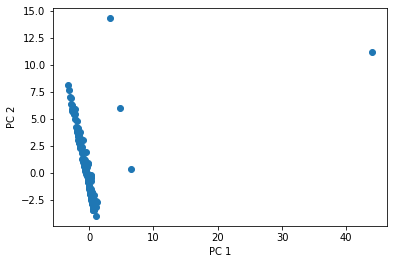

In [0]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = new_df.drop('convert',axis=1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

6) Splitting the dataset and fitting different models

In [0]:
#creating the predictors and target variables
X = new_df.drop('convert',axis=1).values

y=new_df['convert'].values

#let's split our data into training and test sets
#from sklearn.cross_validation import train_test_split # this is DeprecationWarning
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    stratify=y,
                                                    random_state = 42)

In [0]:
print(X_train.shape, X_test.shape)
X_train

(147, 88) (37, 88)


array([[-0.01,  0.36, -4.  , ...,  0.09, -0.07, -0.02],
       [-0.02,  1.82, -1.6 , ..., -0.04, -0.66,  0.21],
       [-0.02,  1.91,  2.59, ..., -0.22,  0.26, -0.09],
       ...,
       [-0.02,  1.49,  2.47, ..., -0.23, -0.48,  0.16],
       [-0.  , -2.6 ,  2.23, ..., -0.23,  0.79, -0.24],
       [-0.01,  0.73,  2.07, ..., -0.5 ,  1.05, -0.32]])

In [0]:
import warnings
warnings.filterwarnings("ignore")


from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline


from sklearn.model_selection import cross_val_score

names = [
         #"Perceptron",
        "LogisticRegression",
        "Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
         #"RBF SVM",          
         #"Neural Net", 
         #"Naive Bayes",  
        "Nearest Neighbors"
         ] 

classifiers = [
   # Perceptron(),
   LogisticRegression(),
    SVC(kernel="linear", C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=400, max_features=1),
   # SVC(kernel='rbf',gamma=2, C=1),
   # MLPClassifier(hidden_layer_sizes=(100,50,50), alpha=1),
   # GaussianNB(),
    KNeighborsClassifier(5)
   ]

for name, clf in zip(names, classifiers):

    pipe_l = make_pipeline( RobustScaler(),
                           PCA(n_components=2),
                            clf)

    scores = cross_val_score( estimator = pipe_l,
                            X = X_train,
                            y = y_train,
                            cv = 5,
                            n_jobs = 1)

    print(name + '\n' + 'CV accuracy scores: %.2f +/- %.2f' %(np.mean(scores), np.std(scores)))

LogisticRegression
CV accuracy scores: 0.55 +/- 0.11
Linear SVM
CV accuracy scores: 0.49 +/- 0.04
Decision Tree
CV accuracy scores: 0.51 +/- 0.04
Random Forest
CV accuracy scores: 0.57 +/- 0.05
Nearest Neighbors
CV accuracy scores: 0.55 +/- 0.09


7) Grid Search and ROC Curve to determine the best model


**SVC Model**

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

pipe_svc = make_pipeline(SVC(random_state=1,probability=True))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

#set the param_grid parameter of GridSearchCV to a list of dictionaries to specify the parameters that we'd want to tune.

# For the linear SVM, we only evaluated the inverse regularization parameter, C; 
param_grid = [{'svc__C': param_range,'svc__kernel': ['linear']},
              
#For the RBF kernel SVM, we tuned both the svc__C and svc__gamma
#parameters. Note that the svc__gamma parameter is specific to kernel SVMs.              
{'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]

#initialized a GridSearchCV object from the sklearn model_selection
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, cv=2, refit=True, n_jobs=-1)
gs = gs.fit(X_train, y_train)

# After we used the training data to perform the grid search, we obtained the score
# of the best-performing model via the best_score_ attribute and looked at its
# parameters, which can be accessed via the best_params_ attribute.
print("The accuray of the model is %s" %gs.best_score_)
print("The best Paramters are %s" %gs.best_params_)
print("The best estimator is %s" %gs.best_estimator_)

The accuray of the model is 0.6602184376156979
The best Paramters are {'svc__C': 10.0, 'svc__gamma': 0.0001, 'svc__kernel': 'rbf'}
The best estimator is Pipeline(memory=None,
         steps=[('svc',
                 SVC(C=10.0, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.0001,
                     kernel='rbf', max_iter=-1, probability=True,
                     random_state=1, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)


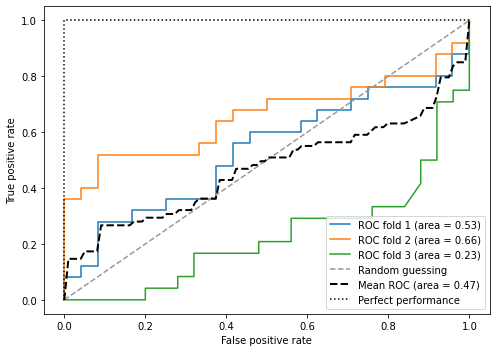

In [0]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.model_selection import StratifiedKFold

pipe_lr = make_pipeline(gs.best_estimator_)

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

**Logistic Regresion**

In [0]:

# For the logistic regression, we are using only penalty as paramter; 

#initialized a GridSearchCV object from the sklearn model_selection
gs = GridSearchCV(estimator=LogisticRegression(), param_grid=[{'penalty': ['l1','l2'],'C' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}], cv=2)
gs = gs.fit(X_train, y_train)

# After we used the training data to perform the grid search, we obtained the score
# of the best-performing model via the best_score_ attribute and looked at its
# parameters, which can be accessed via the best_params_ attribute.
print("The accuray of the model is %s" %gs.best_score_)
print("The best Paramters are %s" %gs.best_params_)
print("The best estimator is %s" %gs.best_estimator_)

log_reg = gs.best_estimator_


The accuray of the model is 0.6467049241021843
The best Paramters are {'C': 0.001, 'penalty': 'l2'}
The best estimator is LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


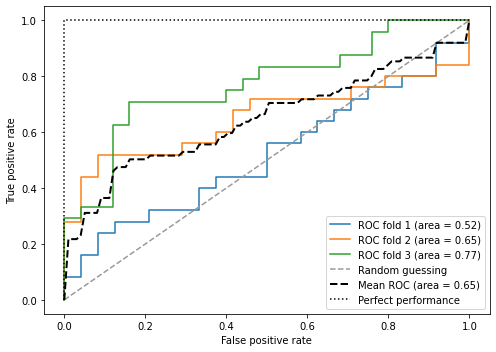

In [0]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.model_selection import StratifiedKFold

pipe_lr = make_pipeline(gs.best_estimator_)

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

**Random Forest**

In [0]:

# For the logistic regression, we are using only penalty as paramter; 

#initialized a GridSearchCV object from the sklearn model_selection
gs = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=[{'max_depth': [1,2,3,4,5,6,7,None]}],
                    scoring='accuracy',
                    cv=2)
gs = gs.fit(X_train, y_train)

# After we used the training data to perform the grid search, we obtained the score
# of the best-performing model via the best_score_ attribute and looked at its
# parameters, which can be accessed via the best_params_ attribute.
print("The accuray of the model is %s" %gs.best_score_)
print("The best Paramters are %s" %gs.best_params_)
print("The best estimator is %s" %gs.best_estimator_)


The accuray of the model is 0.5986671603109959
The best Paramters are {'max_depth': 2}
The best estimator is RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


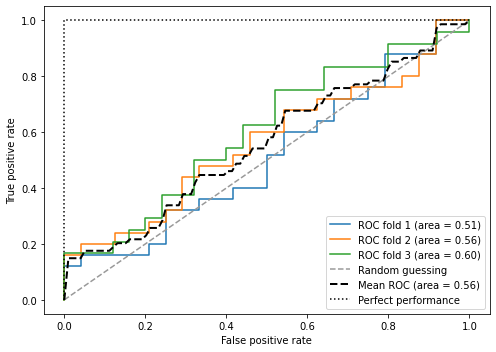

In [0]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.model_selection import StratifiedKFold

pipe_lr = make_pipeline(gs.best_estimator_)

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

**KNN NEIGHBOURS**

In [0]:

# For the KNN using n_neighbors as the paramater ; 

#initialized a GridSearchCV object from the sklearn model_selection
gs = GridSearchCV(estimator=KNeighborsClassifier(5),
                    param_grid=[{'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}],
                    scoring='accuracy',
                    cv=5)
gs = gs.fit(X_train, y_train)

# After we used the training data to perform the grid search, we obtained the score
# of the best-performing model via the best_score_ attribute and looked at its
# parameters, which can be accessed via the best_params_ attribute.
print("The accuray of the model is %s" %gs.best_score_)
print("The best Paramters are %s" %gs.best_params_)
print("The best estimator is %s" %gs.best_estimator_)

The accuray of the model is 0.5714942528735631
The best Paramters are {'n_neighbors': 2}
The best estimator is KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')


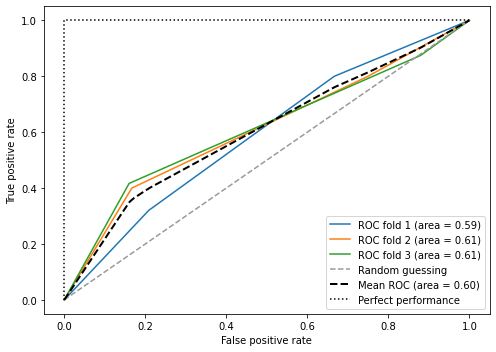

In [0]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.model_selection import StratifiedKFold

pipe_lr = make_pipeline(gs.best_estimator_)

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

**SMOTE** - 
Since the data is imbalanced utilzing SMOTE (Synthetic Minority Oversampling Technique) which is a statistical technique to increase the number of data points so as to create a more balanced dataset

In [0]:
file = '/content/drive/My Drive/Big Data Machine Learning/biddings.csv'
# Step1: Let's import some cancer data from the web
df = pd.read_csv(file,nrows=50000)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,convert
0,-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,-0.27,0.50,-0.55,-0.27,-0.89,-0.01,-0.53,1.19,-0.36,0.07,0.01,0.08,0.06,0.18,0.47,0.33,0.49,-0.33,0.32,-0.05,0.20,0.12,-0.07,0.11,0.07,-0.04,-0.12,-0.00,-0.08,-0.02,...,-0.41,-0.62,-1.09,-0.27,0.03,-0.15,-1.67,0.49,-0.08,-0.10,-0.31,-0.20,1.16,-0.49,-0.26,1.34,1.02,1.28,-0.58,-1.17,0.02,-1.59,-1.17,-0.59,0.76,0.05,1.06,-0.12,0.18,-1.82,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07,0
1,0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,-0.36,-0.23,-0.07,0.61,1.04,-1.99,1.85,0.69,0.22,3.86,0.14,0.39,0.51,0.61,1.06,0.74,0.33,0.09,-0.12,0.16,0.16,0.16,-0.00,-0.01,-0.02,-0.13,-0.08,-0.06,-0.00,0.02,...,-0.23,-0.18,0.43,0.56,-1.62,-0.67,-1.53,0.64,0.24,-1.03,-0.49,-0.62,-1.75,0.12,0.07,-0.17,1.30,1.52,-0.56,-0.99,1.14,1.20,-1.82,3.23,1.23,0.08,1.17,-1.43,2.69,-0.30,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22,0
2,0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,-0.97,1.17,-0.54,-0.21,-0.21,-1.44,-0.92,-0.78,0.45,-0.03,-0.09,0.16,0.30,-0.83,0.05,1.43,1.33,-0.85,0.20,-0.11,0.39,0.13,0.01,0.09,-0.01,-0.12,-0.03,-0.03,0.06,0.06,...,0.17,-0.04,2.03,0.00,-0.66,0.77,-1.05,0.47,0.77,0.50,-1.14,-1.12,-0.34,0.40,-0.39,-0.21,-1.23,0.44,-0.12,-0.40,-0.54,0.63,0.27,-1.06,-0.38,0.11,0.43,-0.44,0.55,-0.72,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37,0
3,-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,-0.07,-0.27,0.02,0.30,0.79,-2.49,0.44,0.69,0.32,3.81,0.15,-0.23,0.45,0.58,0.87,0.81,0.02,0.11,-0.09,0.09,0.12,0.15,0.02,-0.02,0.02,0.17,-0.17,-0.01,0.04,0.02,...,-0.28,-0.23,-0.45,0.68,-0.98,0.24,-0.54,1.93,-0.06,-0.33,0.41,0.03,0.77,0.15,-0.28,-0.52,0.33,0.87,-0.34,0.26,-0.57,0.52,0.23,-0.58,-0.12,0.06,-0.74,0.56,0.39,0.29,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18,0
4,-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,-0.28,-1.12,4.90,-0.49,3.59,2.74,0.94,1.34,-0.61,0.44,0.38,-0.53,0.07,0.64,-0.68,-0.92,-1.68,0.81,0.17,-0.44,1.38,0.82,0.48,-0.32,-0.83,0.80,-1.52,0.07,0.54,0.14,...,-0.15,-0.57,-0.31,-0.07,-0.04,0.22,-0.01,0.22,-0.20,-0.30,-1.68,-0.04,0.43,-0.09,0.00,0.54,-1.74,-0.87,0.74,1.48,0.19,0.82,0.49,0.59,1.71,-0.02,-0.77,-0.68,0.38,-0.09,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07,0


In [0]:
X = df.drop('convert', axis=1)
y = df['convert']

#Performing Stratified cross validation and spliiting the data into train and test
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

Train: [ 9996  9997  9998 ... 49997 49998 49999] Test: [    0     1     2 ... 10792 10830 11186]
Train: [    0     1     2 ... 49997 49998 49999] Test: [ 9996  9997  9998 ... 19997 19998 21062]
Train: [    0     1     2 ... 49997 49998 49999] Test: [19999 20000 20001 ... 30001 30002 30003]
Train: [    0     1     2 ... 49997 49998 49999] Test: [27629 27640 27918 ... 40003 40004 40005]
Train: [    0     1     2 ... 40003 40004 40005] Test: [36657 37012 37513 ... 49997 49998 49999]


In [0]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))



# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression(penalty='l2')

log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
   # auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 40000 | Length of y (train): 40000
Length of X (test): 10000 | Length of y (test): 10000
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.73955
precision: 0.0020914318882587096
recall: 0.3038095238095238
f1: 0.0041540822723770115
---------------------------------------------------------------------------------------------------------------------------------------


In [0]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

labels = ['No Click', 'Click']

d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.567568
1,Oversampling (SMOTE),0.736100


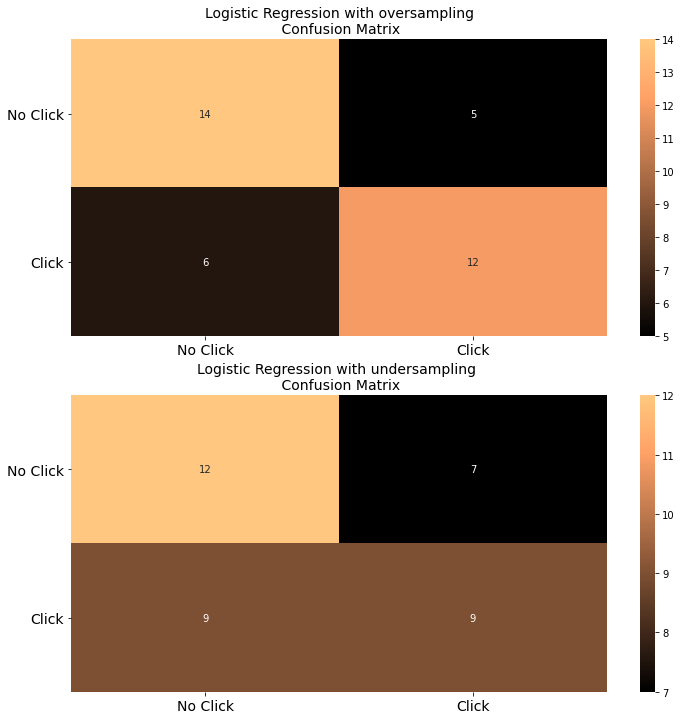

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Logistic Regression fitted using SMOTE technique
y_pred_smote = best_est.predict(X_test)

# Other models fitted with UnderSampling
y_pred_us = log_reg.predict(X_test)


log_reg_smote = confusion_matrix(y_test, y_pred_smote)
log_reg_us = confusion_matrix(y_test, y_pred_us)

#print(log_reg_smote)
fig, ax = plt.subplots(2,figsize=(12,12))

labels = ['No Click', 'Click']

sns.heatmap(log_reg_smote, ax=ax[0], annot=True, cmap=plt.cm.copper)
ax[0].set_title("Logistic Regression with oversampling\n Confusion Matrix", fontsize=14)
ax[0].set_xticklabels(labels, fontsize=14, rotation=0)
ax[0].set_yticklabels(labels, fontsize=14, rotation=360)

sns.heatmap(log_reg_us, ax=ax[1], annot=True, cmap=plt.cm.copper)
ax[1].set_title("Logistic Regression with undersampling \n Confusion Matrix", fontsize=14)
ax[1].set_xticklabels(labels, fontsize=14, rotation=0)
ax[1].set_yticklabels(labels, fontsize=14, rotation=360)

plt.show()

